Data 1: https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv

Data 2: https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv

**Random Imputation work good for Linear Algorithms**
Random Imputation can work on both Numerical and Categorical variable

Random Imputation is a technique used for replacing the missing data with substituted values, in order to retain most of the data/information of the dataset. This technique is used in situations where removing the data from the dataset is not feasible, as it can lead to a reduction in the size of the dataset and potential bias in the analysis. Random Imputation involves randomly assigning values to replace the missing data, using a specified distribution such as the mean or median of the non-missing values. This can be implemented in Python using the pandas library's fillna() function

Random imputation is a technique used to handle missing data in a dataset by replacing the missing values with randomly selected values from the same variable. Here's a step-by-step explanation:

1. **Identify Missing Values**: Begin by identifying which values in your dataset are missing. These are typically represented as NaN (Not a Number), NULL, NA, or other placeholders depending on the software or language you're using.

2. **Random Selection**: For each missing value, randomly select a value from the observed values of the same variable. This selection process involves randomly choosing a value from the pool of existing values in the variable.

3. **Replace Missing Values**: Substitute the missing values in the dataset with the randomly selected values. Each missing value is replaced with a different randomly chosen value from the variable's observed values.

4. **Considerations**: There are several considerations when using random imputation:
   - **Randomness**: Random imputation introduces randomness into the dataset, which may or may not accurately represent the true underlying data distribution.
   - **Potential Bias**: Since random imputation doesn't consider any underlying patterns or relationships in the data, it may introduce bias into the dataset.
   - **Impact on Analysis**: The randomness of the imputed values can impact the results of subsequent analyses or models. It's important to understand how this randomness affects the interpretation of the data.
   - **Documentation**: It's essential to document the random imputation process to ensure transparency and reproducibility of the analysis.

5. **Evaluation**: Evaluate the impact of random imputation on the dataset and analysis results. Consider whether it introduces any unintended consequences or distortions in the data.

Random imputation is a straightforward method for handling missing data, but it may not be suitable for all situations. It assumes that missing values are missing completely at random or missing at random within the variable being imputed. Therefore, it's often used as a basic imputation technique or as part of a more comprehensive imputation strategy.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',
                usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived'] 

In [8]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [9]:
# just for the understanding creating a new columns
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_Imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


Subset Imputation:

`X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]` selects only the rows in X_train where Age_Imputed is missing.

Random Sampling:

`X_train['Age'].dropna().sample(X_train['Age'].isnull().sum())` randomly samples `X_train['Age'].isnull().sum()` (the number of missing values in Age) values from the non-missing values in Age.

Assignment:
The sampled values are assigned to the missing values in Age_Imputed using indexing and assignment.

In [11]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [12]:
X_train.isnull().sum()

Age            148
Fare             0
Age_Imputed      0
dtype: int64

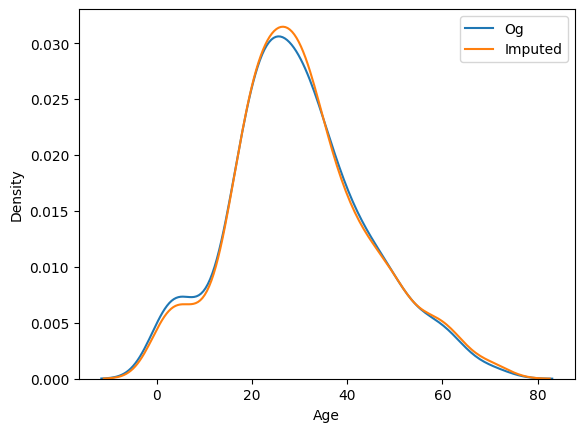

In [13]:
# Distribution between Age and Age Imputed
sns.kdeplot(X_train['Age'], label='Og')
sns.kdeplot(X_train['Age_Imputed'], label='Imputed')

plt.legend()
plt.show()

In [14]:
X_train['Age'].var(), X_train['Age_Imputed'].var()

(204.34951339046142, 205.0643453744528)

In [15]:
X_train.cov()

,Age,Fare,Age_Imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,57.871534
Age_Imputed,204.349513,57.871534,205.064345


<Axes: >

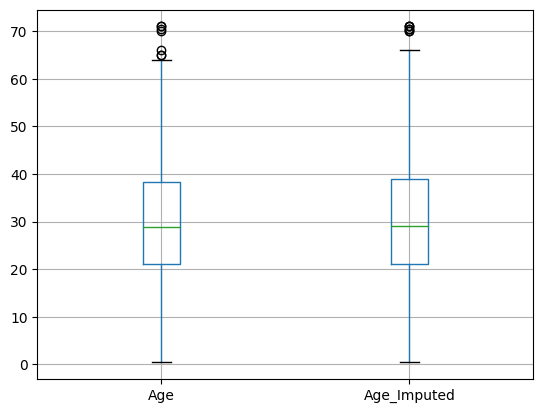

In [16]:
X_train[['Age', 'Age_Imputed']].boxplot()

In [17]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state = int(observation['Fare']))

In [18]:
# Random Imputation For categorical variable

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv',
                  usecols=['GarageQual','FireplaceQu','SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [22]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
744,TA,TA,180000,TA,TA
1096,NaN,NaN,127000,NaN,NaN
1137,NaN,NaN,94000,NaN,NaN
1241,NaN,TA,248328,TA,NaN
804,NaN,TA,118000,TA,NaN


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]= X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]= X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [28]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]= X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]= X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [29]:
X_train.isnull().mean()*100

FireplaceQu            47.688356
GarageQual              5.565068
SalePrice               0.000000
GarageQual_imputed      0.000000
FireplaceQu_imputed     0.000000
dtype: float64

In [30]:
X_test.isnull().mean()*100

FireplaceQu            45.547945
GarageQual              5.479452
SalePrice               0.000000
GarageQual_imputed      0.000000
FireplaceQu_imputed     0.000000
dtype: float64

In [31]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [32]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [33]:
# Frequency between them should be less

In [34]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.543210
Fa,0.040917,0.052750
Po,0.027823,0.034792
Ex,0.024550,0.029181


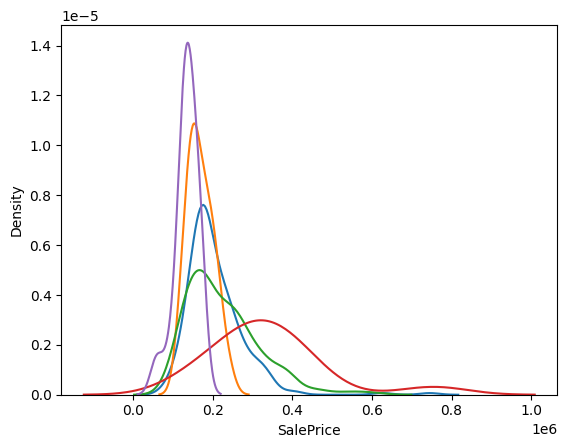

In [35]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

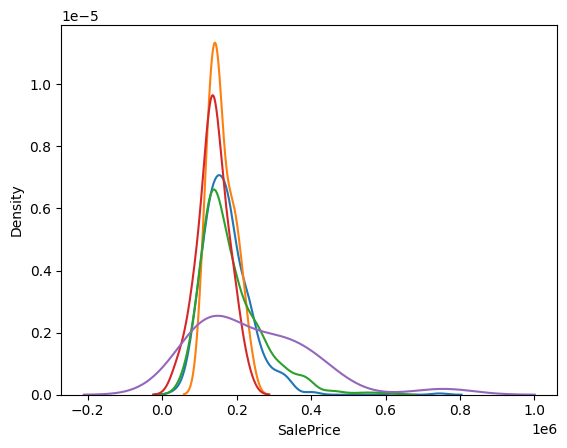

In [36]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()